In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O data-homework.csv

--2023-10-06 23:45:34--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data-homework.csv’

data-homework.csv   100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2023-10-06 23:45:34 (19.2 MB/s) - ‘data-homework.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data-homework.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
columns =['Make', 'Model', 'Year','Engine HP',
       'Engine Cylinders', 'Transmission Type',
        'Vehicle Style','highway MPG', 'city mpg','MSRP']

In [7]:
df_sample = df[columns]
df_sample.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
df_sample.columns = df_sample.columns.str.lower().str.replace(' ', '_')

In [9]:
df_sample = df_sample.fillna(0)

In [12]:
df_sample['above_average'] = (df_sample.msrp > df_sample.msrp.mean()).astype(int)
df_sample.above_average

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df_sample, test_size= 0.2, random_state= 1)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 42)

In [16]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [19]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop =True)
df_test = df_test.reset_index(drop = True)

In [21]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [72]:
df_val = df_val.drop(columns=['msrp','above_average'])
df_test = df_test.drop(columns=['msrp','above_average'])

In [74]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [24]:
from sklearn.metrics import roc_auc_score

In [33]:
highest_auc = 0
best_variable = None
for numeric in numerical:
    auc_score = roc_auc_score(df_train['above_average'],df_train[numeric])
    
    # check if auc_score is less than 0.5 and invert the variable
    if auc_score < 0.5:
        inv_auc = roc_auc_score(df_train['above_average'], -df_train[numeric])
        if inv_auc > highest_auc:
            highest_auc = inv_auc
            best_variable = numeric
            
    else:
        if auc_score > highest_auc:
            highest_auc = auc_score
            best_variable = numeric
    
print("Numerical variable with the highest AUC:", best_variable)
print("AUC score for highest is: ",highest_auc)

Numerical variable with the highest AUC: engine_hp
AUC score for highest is:  0.9175916846284381


In [73]:
categorical = ['make','model','transmission_type','vehicle_style']

In [75]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [76]:
from sklearn.feature_extraction import DictVectorizer

In [77]:
dv = DictVectorizer(sparse = False)

In [78]:
X_train = dv.fit_transform(train_dicts)

In [79]:
val_dicts = df_val[categorical+numerical].to_dict(orient ='records')
X_val = dv.transform(val_dicts)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [82]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [83]:
y_pred = model.predict_proba(X_val)[:,1]
price_decission = (y_pred>0.5)
(y_val == price_decission).mean()

0.9479647503147294

In [84]:
round(roc_auc_score(y_val,y_pred),3)

0.984

In [106]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [115]:
scores=[]
thresholds = np.linspace(0,1,101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    
    scores.append((t,tp,fp,fn,tn,precision,recall))

/var/folders/_s/50t5h4vd38xcdq2gnmfv03pw0000gn/T/ipykernel_45659/2925060096.py:16: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)


In [116]:
columns =['threshold','tp','fp','fn','tn','precision','recall']
df_scores = pd.DataFrame(scores, columns = columns)

In [119]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,683,1700,0,0,0.286614,1.000000
1,0.01,681,738,2,962,0.479915,0.997072
2,0.02,681,589,2,1111,0.536220,0.997072
3,0.03,681,512,2,1188,0.570830,0.997072
4,0.04,681,451,2,1249,0.601590,0.997072
...,...,...,...,...,...,...,...
96,0.96,278,0,405,1700,1.000000,0.407028
97,0.97,253,0,430,1700,1.000000,0.370425
98,0.98,231,0,452,1700,1.000000,0.338214
99,0.99,204,0,479,1700,1.000000,0.298682


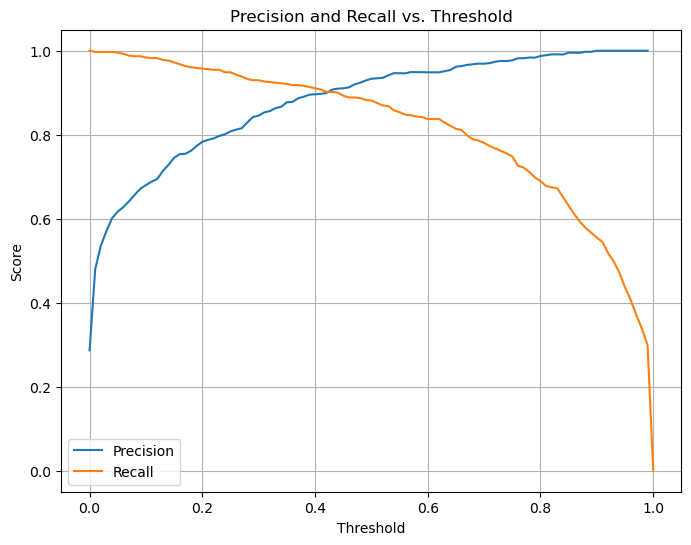

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision', linestyle='-')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.grid(True)
plt.legend()

plt.show()

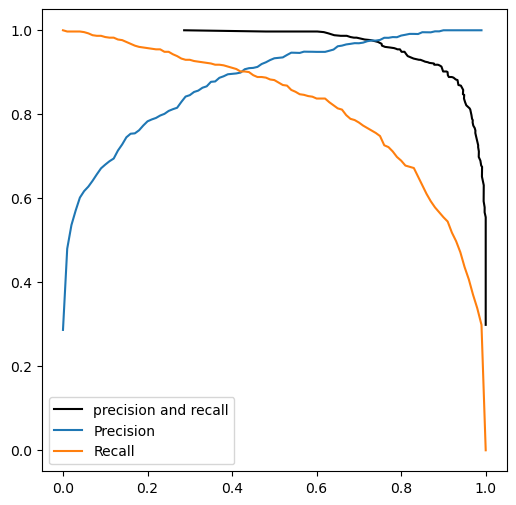

In [124]:
plt.figure(figsize=(6,6))
plt.plot(df_scores['precision'], df_scores['recall'], label='precision and recall', linestyle='-', color = 'black')
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision', linestyle='-')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall', linestyle='-')
plt.legend()

In [147]:
f1_scores=0
best_thre=0
thresholds = np.linspace(0,1,101)
for t in thresholds:
    precision = df_scores[df_scores['threshold'] == t]['precision'].values[0]
    recall = df_scores[df_scores['threshold'] == t]['recall'].values[0]
    f1_score = 2*((precision*recall)/(precision+recall))
    if f1_score > f1_scores:
        f1_scores = f1_score
        best_thre = t
print("Best thresholds for f1_score: ", best_thre)
print("Best f1_score: ",f1_scores)

Best thresholds for f1_score:  0.5
Best f1_score:  0.9066265060240964


In [148]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [149]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [150]:
from sklearn.model_selection import KFold

In [151]:
!pip install tqdm

In [152]:
from tqdm import tqdm

In [153]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [156]:
scores = []
for train_indx, val_indx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_indx]
    df_val = df_full_train.iloc[val_indx]
    
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
    print("%.3f %.3f"%(np.mean(scores), np.std(scores)))

2it [00:00,  4.94it/s]

0.978 0.000
0.980 0.001


4it [00:00,  5.63it/s]

0.981 0.003
0.980 0.003


5it [00:00,  5.34it/s]

0.980 0.003


In [159]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|███████████▎                                 | 1/4 [00:00<00:02,  1.16it/s]

C=0.01 0.952 +- 0.002


 50%|██████████████████████▌                      | 2/4 [00:01<00:01,  1.23it/s]

C=0.1 0.972 +- 0.002


 75%|█████████████████████████████████▊           | 3/4 [00:02<00:00,  1.24it/s]

C=0.5 0.977 +- 0.002


100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]

C=10 0.981 +- 0.002
